## Starting Modeling process after some practice. Now using full data set, trying OHE, looking at correlations and iterating

Note: data_cleaned file has been edited since. This run through did not have columns
- mon_of_sale_num from date
- season_of_same from mon_of_sale_num
- mon_of_sale_name from mon_of_sale_num
- single_fam_home = 0 is bedrooms > 5, 1 if bedrooms >= 5

In this notebook 'yr_of_sale' is labelled yr_of assessment -- it was mislabeled. The date in the original data referes to the year the home was sold

## Now to start modeling process

In [29]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# Import scikit learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('data_cleaned.csv')

Keep in mind outliers from Data Cleansing (look back at notebook)

In [3]:
# Overview of final data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21597 non-null  int64  
 1   date                21597 non-null  object 
 2   price               21597 non-null  float64
 3   bedrooms            21597 non-null  int64  
 4   bathrooms           21597 non-null  float64
 5   sqft_living         21597 non-null  int64  
 6   sqft_lot            21597 non-null  int64  
 7   floors              21597 non-null  float64
 8   waterfront          21597 non-null  float64
 9   view                21597 non-null  float64
 10  condition           21597 non-null  int64  
 11  grade               21597 non-null  int64  
 12  sqft_above          21597 non-null  int64  
 13  sqft_basement       21597 non-null  float64
 14  yr_built            21597 non-null  int64  
 15  yr_renovated        21597 non-null  int64  
 16  zipc

## One Hot Encoding

In [4]:
# grade_category is last string left - only 3 categories, One Hot Encode. 
data_OHE = pd.get_dummies(data, columns=['grade_category'])
# Not dropping first, exploring feature importance

In [6]:
data_OHE.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,yr_of_assessment,has_been_viewed,has_basement,has_been_renovated,in_seattle,price_in_thousands,grade_category_Average,grade_category_High,grade_category_Low
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,5288,2015,1,0,0,0,325.0,1,0,0
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,1670,2015,1,1,0,1,540.0,1,0,0
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,1189,2015,1,0,0,1,344.0,1,0,0
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,12760,2015,1,0,0,0,565.0,1,0,0
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,7653,2015,1,0,0,0,320.0,1,0,0


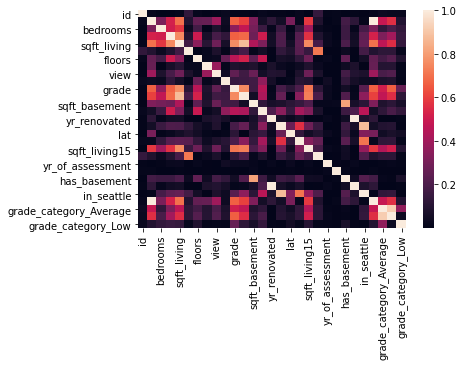

In [8]:
sns.heatmap(data_OHE.corr().abs())
plt.show()

## Modeling with grade_category OHE

In [11]:
# Define X and y
X_cols = [c for c in data_OHE.columns.to_list() if c not in ['id', 'date','price', 'price_in_thousands']]

X = data_OHE[X_cols]
y = data_OHE['price']

In [12]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
# Instantiate a scaler
scaler = StandardScaler()

In [14]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Instantiate a linear regression model
lr = LinearRegression()

In [16]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.7200472479447863
Mean Absolute Error: 121271.90293765368
---
Testing Scores:
R2: 0.7114412235835348
Mean Absolute Error: 121469.82436085188
Root Mean Squared Error: 348.52521337896326


In [47]:
data_OHE.corr().price.sort_values(ascending=False)
# grade_category High is correlated, Low and Average are not

price_in_thousands        1.000000
price                     1.000000
sqft_living               0.701917
grade                     0.667951
sqft_above                0.605368
sqft_living15             0.585241
grade_category_High       0.559649
bathrooms                 0.525906
view                      0.393749
sqft_basement             0.322192
bedrooms                  0.308787
lat                       0.306692
waterfront                0.264306
floors                    0.256804
has_basement              0.178264
yr_renovated              0.117855
has_been_renovated_1      0.117543
sqft_lot                  0.089876
sqft_lot15                0.082845
yr_built                  0.053953
condition                 0.036056
long                      0.022036
has_been_viewed_0         0.012024
in_seattle_0              0.011959
yr_of_assessment          0.003727
in_seattle_1             -0.011959
has_been_viewed_1        -0.012024
id                       -0.016772
zipcode             

In [24]:
# look at the coefficients with the names of each col
dict(zip(X.columns, lr.coef_))
# pd.DataFrame.from_dict(dict(zip(X.columns, lr.coef_)), orient='index')

{'bedrooms': -23690.69205296938,
 'bathrooms': 29579.875687135154,
 'sqft_living': 61600.03925081037,
 'sqft_lot': 5246.9155191668515,
 'floors': -2311.196822973995,
 'waterfront': 52283.949151698325,
 'view': 37967.53174792084,
 'condition': 23878.894810661954,
 'grade': 92575.11854308759,
 'sqft_above': 84883.97438143083,
 'sqft_basement': 33086.50189652445,
 'yr_built': -56225.23446820651,
 'yr_renovated': 1342022.3176128631,
 'zipcode': -86801.7508319469,
 'lat': 78156.79004144245,
 'long': -10791.364235674113,
 'sqft_living15': 22305.4881562087,
 'sqft_lot15': -9054.155829711086,
 'yr_of_assessment': 14108.548787844578,
 'has_been_viewed': -3073.253364737121,
 'has_basement': -5608.11064600441,
 'has_been_renovated': -1329315.9165079384,
 'in_seattle': 87885.25263713591,
 'grade_category_Average': -1.2550217373597814e+17,
 'grade_category_High': -1.1715070602255354e+17,
 'grade_category_Low': -4.8940312687274344e+16}

## Now try with statsmodels - OHE

In [30]:
model = sm.OLS(y, sm.add_constant(X))

In [31]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     2197.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:34:43   Log-Likelihood:            -2.9372e+05
No. Observations:               21597   AIC:                         5.875e+05
Df Residuals:                   21571   BIC:                         5.877e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.215e+07   6.17e+06      8.449      0.000    4.01e+07    6.42e+07
bedrooms               -2.774e+04   1865.025    -14.873      0.000   -3.14e+04   -2.41e+04
bathrooms                3.85e+04   3195.797     12.047      0.000    3.22e+04    4.48e+04
sqft_living               72.7239     20.586      3.533      0.000      32.374     113.073
sqft_lot                   0.1064      0.046      2.288      0.022       0.015       0.198
floors                 -8372.5973   3643.771     -2.298      0.022   -1.55e+04   -1230.537
waterfront              6.385e+05   1.77e+04     36.164      0.000    6.04e+05    6.73e+05
view                    5.011e+04   2064.437     24.271      0.000    4.61e+04    5.42e+04
condition               3.697e+04   2297.059     16.097      0.000    3.25e+04    4.15e+04
grade                   7.747e+04   2434.961     31.814      0.000    7.27e+04    8.22e+04
sqft_above                99.8814     20.610      4.846      0.000      59.484     140.279
sqft_basement             71.3608     21.056      3.389      0.001      30.089     112.633
yr_built               -1859.7203     73.951    -25.148      0.000   -2004.671   -1714.770
yr_renovated            3511.4543    462.199      7.597      0.000    2605.510    4417.399
zipcode                -1659.9562     54.564    -30.422      0.000   -1766.906   -1553.006
lat                     5.559e+05   1.07e+04     52.043      0.000    5.35e+05    5.77e+05
long                   -6.779e+04   1.43e+04     -4.740      0.000   -9.58e+04   -3.98e+04
sqft_living15             34.4813      3.409     10.114      0.000      27.799      41.164
sqft_lot15                -0.3552      0.071     -4.993      0.000      -0.495      -0.216
yr_of_assessment        3.062e+04   2848.809     10.747      0.000     2.5e+04    3.62e+04
has_been_viewed        -4.623e+04   2.46e+04     -1.876      0.061   -9.45e+04    2074.750
has_basement           -8375.5651   5047.107     -1.659      0.097   -1.83e+04    1517.138
has_been_renovated     -6.939e+06   9.23e+05     -7.522      0.000   -8.75e+06   -5.13e+06
in_seattle              1.857e+05   7683.439     24.165      0.000    1.71e+05    2.01e+05
grade_category_Average  1.729e+07   2.06e+06      8.405      0.000    1.33e+07    2.13e+07
grade_category_High     1.744e+07   2.06e+06      8.478      0.000    1.34e+07    2.15e+07
grade_category_Low      1.741e+07   2.06e+06      8.462      0.000    1.34e+07    2.14e+07
==============================================================================
Omnibus:                    18651.222   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2180924.080
Skew:                           3.609   Prob(JB):                         0.00
Kurtosis:                      51.698

## Add more OHE for Booleans and try again - OHE2

In [34]:
# grade_category and booleans
data_OHE2 = pd.get_dummies(data, columns=['grade_category', 'has_been_viewed', 'has_been_renovated', 'in_seattle'])
# Not dropping first, exploring feature importance

In [35]:
# Define X and y
X_cols = [c for c in data_OHE2.columns.to_list() if c not in ['id', 'date','price', 'price_in_thousands']]

X = data_OHE2[X_cols]
y = data_OHE2['price']

In [36]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
# Instantiate a scaler
scaler = StandardScaler()

In [38]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Instantiate a linear regression model
lr = LinearRegression()

In [40]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.7207222203444302
Mean Absolute Error: 121968.28136311704
---
Testing Scores:
R2: 0.7085368772445706
Mean Absolute Error: 121896.36207999857
Root Mean Squared Error: 349.13659516011575


In [64]:
data_OHE2.corr().price.sort_values(ascending=False)
# grade_category High is most highly correlated
# in_seattle, has_been_viewed, has_been renovated correlation cancels each other out

price_in_thousands        1.000000
price                     1.000000
sqft_living               0.701917
grade                     0.667951
sqft_above                0.605368
sqft_living15             0.585241
grade_category_High       0.559649
bathrooms                 0.525906
view                      0.393749
sqft_basement             0.322192
bedrooms                  0.308787
lat                       0.306692
waterfront                0.264306
floors                    0.256804
has_basement              0.178264
yr_renovated              0.117855
has_been_renovated_1      0.117543
sqft_lot                  0.089876
sqft_lot15                0.082845
yr_built                  0.053953
condition                 0.036056
long                      0.022036
has_been_viewed_0         0.012024
in_seattle_0              0.011959
yr_of_assessment          0.003727
in_seattle_1             -0.011959
has_been_viewed_1        -0.012024
id                       -0.016772
zipcode             

## Now try with statsmodels - OHE2

In [44]:
model = sm.OLS(y, sm.add_constant(X))

In [45]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     2197.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:38:55   Log-Likelihood:            -2.9372e+05
No. Observations:               21597   AIC:                         5.875e+05
Df Residuals:                   21571   BIC:                         5.877e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.334e+07   2.91e+06      8.020      0.000    1.76e+07     2.9e+07
bedrooms               -2.774e+04   1865.025    -14.873      0.000   -3.14e+04   -2.41e+04
bathrooms                3.85e+04   3195.797     12.047      0.000    3.22e+04    4.48e+04
sqft_living               72.7239     20.586      3.533      0.000      32.374     113.073
sqft_lot                   0.1064      0.046      2.288      0.022       0.015       0.198
floors                 -8372.5973   3643.771     -2.298      0.022   -1.55e+04   -1230.537
waterfront              6.385e+05   1.77e+04     36.164      0.000    6.04e+05    6.73e+05
view                    5.011e+04   2064.437     24.271      0.000    4.61e+04    5.42e+04
condition               3.697e+04   2297.059     16.097      0.000    3.25e+04    4.15e+04
grade                   7.747e+04   2434.961     31.814      0.000    7.27e+04    8.22e+04
sqft_above                99.8814     20.610      4.846      0.000      59.484     140.279
sqft_basement             71.3608     21.056      3.389      0.001      30.089     112.633
yr_built               -1859.7203     73.951    -25.148      0.000   -2004.671   -1714.770
yr_renovated            3511.4543    462.199      7.597      0.000    2605.510    4417.399
zipcode                -1659.9562     54.564    -30.422      0.000   -1766.906   -1553.006
lat                     5.559e+05   1.07e+04     52.043      0.000    5.35e+05    5.77e+05
long                   -6.779e+04   1.43e+04     -4.740      0.000   -9.58e+04   -3.98e+04
sqft_living15             34.4813      3.409     10.114      0.000      27.799      41.164
sqft_lot15                -0.3552      0.071     -4.993      0.000      -0.495      -0.216
yr_of_assessment        3.062e+04   2848.809     10.747      0.000     2.5e+04    3.62e+04
has_basement           -8375.5651   5047.107     -1.659      0.097   -1.83e+04    1517.138
grade_category_Average  7.691e+06    9.7e+05      7.929      0.000    5.79e+06    9.59e+06
grade_category_High     7.842e+06    9.7e+05      8.083      0.000    5.94e+06    9.74e+06
grade_category_Low      7.809e+06    9.7e+05      8.048      0.000    5.91e+06    9.71e+06
has_been_viewed_0       1.169e+07   1.46e+06      8.035      0.000    8.84e+06    1.45e+07
has_been_viewed_1       1.165e+07   1.45e+06      8.005      0.000     8.8e+06    1.45e+07
has_been_renovated_0    1.514e+07    1.5e+06     10.084      0.000    1.22e+07    1.81e+07
has_been_renovated_1    8.201e+06   1.55e+06      5.287      0.000    5.16e+06    1.12e+07
in_seattle_0            1.158e+07   1.45e+06      7.970      0.000    8.73e+06    1.44e+07
in_seattle_1            1.176e+07   1.46e+06      8.071      0.000    8.91e+06    1.46e+07
==============================================================================
O

## Try with dropping first one OHE - OHE3

In [51]:
## Try with dropping first one OHE
data_OHE3 = pd.get_dummies(data, columns=['grade_category', 'has_been_viewed', 'has_been_renovated', 'in_seattle'],
                          drop_first=True)

In [53]:
# Define X and y
X_cols = [c for c in data_OHE3.columns.to_list() if c not in ['id', 'date','price', 'price_in_thousands']]

X = data_OHE3[X_cols]
y = data_OHE3['price']

In [54]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
# Instantiate a scaler
scaler = StandardScaler()

In [56]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Instantiate a linear regression model
lr = LinearRegression()

In [58]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [59]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.7196375315755905
Mean Absolute Error: 122085.18834524717
---
Testing Scores:
R2: 0.7119609401814866
Mean Absolute Error: 121221.98417613294
Root Mean Squared Error: 348.1694762269274


In [60]:
data_OHE3.corr().price.sort_values(ascending=False)
# grade_category High is correlated, Low and Average are not

price_in_thousands      1.000000
price                   1.000000
sqft_living             0.701917
grade                   0.667951
sqft_above              0.605368
sqft_living15           0.585241
grade_category_High     0.559649
bathrooms               0.525906
view                    0.393749
sqft_basement           0.322192
bedrooms                0.308787
lat                     0.306692
waterfront              0.264306
floors                  0.256804
has_basement            0.178264
yr_renovated            0.117855
has_been_renovated_1    0.117543
sqft_lot                0.089876
sqft_lot15              0.082845
yr_built                0.053953
condition               0.036056
long                    0.022036
yr_of_assessment        0.003727
in_seattle_1           -0.011959
has_been_viewed_1      -0.012024
id                     -0.016772
zipcode                -0.053402
grade_category_Low     -0.090469
Name: price, dtype: float64

## Now try with statsmodels - OHE

In [62]:
model = sm.OLS(y, sm.add_constant(X))

In [63]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     2197.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:45:46   Log-Likelihood:            -2.9372e+05
No. Observations:               21597   AIC:                         5.875e+05
Df Residuals:                   21571   BIC:                         5.877e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.945e+07   8.23e+06      8.438      0.000    5.33e+07    8.56e+07
bedrooms             -2.774e+04   1865.025    -14.873      0.000   -3.14e+04   -2.41e+04
bathrooms              3.85e+04   3195.797     12.047      0.000    3.22e+04    4.48e+04
sqft_living             72.7239     20.586      3.533      0.000      32.374     113.073
sqft_lot                 0.1064      0.046      2.288      0.022       0.015       0.198
floors               -8372.5972   3643.771     -2.298      0.022   -1.55e+04   -1230.537
waterfront            6.385e+05   1.77e+04     36.164      0.000    6.04e+05    6.73e+05
view                  5.011e+04   2064.437     24.271      0.000    4.61e+04    5.42e+04
condition             3.697e+04   2297.059     16.097      0.000    3.25e+04    4.15e+04
grade                 7.747e+04   2434.961     31.814      0.000    7.27e+04    8.22e+04
sqft_above              99.8814     20.610      4.846      0.000      59.484     140.279
sqft_basement           71.3608     21.056      3.389      0.001      30.089     112.633
yr_built             -1859.7203     73.951    -25.148      0.000   -2004.671   -1714.770
yr_renovated          3511.4543    462.199      7.597      0.000    2605.510    4417.399
zipcode              -1659.9562     54.564    -30.422      0.000   -1766.906   -1553.006
lat                   5.559e+05   1.07e+04     52.043      0.000    5.35e+05    5.77e+05
long                 -6.779e+04   1.43e+04     -4.740      0.000   -9.58e+04   -3.98e+04
sqft_living15           34.4813      3.409     10.114      0.000      27.799      41.164
sqft_lot15              -0.3552      0.071     -4.993      0.000      -0.495      -0.216
yr_of_assessment      3.062e+04   2848.809     10.747      0.000     2.5e+04    3.62e+04
has_basement         -8375.5651   5047.107     -1.659      0.097   -1.83e+04    1517.138
grade_category_High   1.502e+05   7118.352     21.095      0.000    1.36e+05    1.64e+05
grade_category_Low    1.173e+05   1.29e+04      9.094      0.000     9.2e+04    1.43e+05
has_been_viewed_1    -4.623e+04   2.46e+04     -1.876      0.061   -9.45e+04    2074.750
has_been_renovated_1 -6.939e+06   9.23e+05     -7.522      0.000   -8.75e+06   -5.13e+06
in_seattle_1          1.857e+05   7683.439     24.165      0.000    1.71e+05    2.01e+05
==============================================================================
Omnibus:                    18651.222   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2180924.080
Skew:                           3.609   Prob(JB):                         0.00
Kurtosis:                      51.698   Cond. No.                     6.24e+08
==============================================================================

Warnings:
[1] Standard Erro

## has_basement, has_been_viewed_1 not significant, rerun OHE3 without these columns

In [65]:
# Define X and y
X_cols = [c for c in data_OHE3.columns.to_list() if c not in ['id', 'date','price', 'price_in_thousands',
                                                             'has_basement', 'has_been_viewed_1']]

X = data_OHE3[X_cols]
y = data_OHE3['price']

In [66]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [67]:
# Instantiate a scaler
scaler = StandardScaler()

In [68]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Instantiate a linear regression model
lr = LinearRegression()

In [70]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [71]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.7137119855626758
Mean Absolute Error: 121975.05996814903
---
Testing Scores:
R2: 0.7298364761051742
Mean Absolute Error: 120645.95015907007
Root Mean Squared Error: 347.3412589357476


In [72]:
data_OHE3.corr().price.sort_values(ascending=False)
# grade_category High is correlated, Low and Average are not

price_in_thousands      1.000000
price                   1.000000
sqft_living             0.701917
grade                   0.667951
sqft_above              0.605368
sqft_living15           0.585241
grade_category_High     0.559649
bathrooms               0.525906
view                    0.393749
sqft_basement           0.322192
bedrooms                0.308787
lat                     0.306692
waterfront              0.264306
floors                  0.256804
has_basement            0.178264
yr_renovated            0.117855
has_been_renovated_1    0.117543
sqft_lot                0.089876
sqft_lot15              0.082845
yr_built                0.053953
condition               0.036056
long                    0.022036
yr_of_assessment        0.003727
in_seattle_1           -0.011959
has_been_viewed_1      -0.012024
id                     -0.016772
zipcode                -0.053402
grade_category_Low     -0.090469
Name: price, dtype: float64

## Now try with statsmodels - OHE3

In [73]:
model = sm.OLS(y, sm.add_constant(X))

In [74]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     2388.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:55:54   Log-Likelihood:            -2.9372e+05
No. Observations:               21597   AIC:                         5.875e+05
Df Residuals:                   21573   BIC:                         5.877e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.918e+07   8.23e+06      8.406      0.000     5.3e+07    8.53e+07
bedrooms              -2.77e+04   1864.996    -14.854      0.000   -3.14e+04    -2.4e+04
bathrooms             3.782e+04   3172.093     11.922      0.000    3.16e+04     4.4e+04
sqft_living             73.0258     20.585      3.548      0.000      32.678     113.373
sqft_lot                 0.1056      0.047      2.271      0.023       0.014       0.197
floors               -8075.2228   3641.164     -2.218      0.027   -1.52e+04    -938.271
waterfront            6.391e+05   1.77e+04     36.196      0.000    6.04e+05    6.74e+05
view                  5.022e+04   2062.233     24.353      0.000    4.62e+04    5.43e+04
condition             3.713e+04   2295.373     16.176      0.000    3.26e+04    4.16e+04
grade                 7.722e+04   2429.783     31.779      0.000    7.25e+04     8.2e+04
sqft_above             100.8586     20.607      4.894      0.000      60.468     141.249
sqft_basement           64.3166     20.574      3.126      0.002      23.990     104.643
yr_built             -1859.2510     73.955    -25.140      0.000   -2004.207   -1714.295
yr_renovated          3524.6954    462.170      7.626      0.000    2618.809    4430.582
zipcode              -1657.4463     54.558    -30.379      0.000   -1764.384   -1550.508
lat                   5.552e+05   1.07e+04     51.989      0.000    5.34e+05    5.76e+05
long                 -6.698e+04   1.43e+04     -4.686      0.000    -9.5e+04    -3.9e+04
sqft_living15           34.3315      3.408     10.075      0.000      27.652      41.011
sqft_lot15              -0.3542      0.071     -4.978      0.000      -0.494      -0.215
yr_of_assessment      3.067e+04   2848.654     10.766      0.000    2.51e+04    3.63e+04
grade_category_High   1.505e+05   7117.181     21.141      0.000    1.37e+05    1.64e+05
grade_category_Low    1.178e+05   1.29e+04      9.145      0.000    9.26e+04    1.43e+05
has_been_renovated_1 -6.965e+06   9.22e+05     -7.551      0.000   -8.77e+06   -5.16e+06
in_seattle_1          1.848e+05   7670.270     24.098      0.000     1.7e+05       2e+05
==============================================================================
Omnibus:                    18699.382   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2204466.512
Skew:                           3.623   Prob(JB):                         0.00
Kurtosis:                      51.962   Cond. No.                     6.24e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+08. This might indicate that there are
strong multicollinearit

## What if we remove negative correlations

In [75]:
# Define X and y
X_cols = [c for c in data_OHE3.columns.to_list() if c not in ['id', 'date','price', 'price_in_thousands',
                                                             'has_basement', 'has_been_viewed_1', 'in_seattle_1',
                                                             'zipcode', 'grade_category_Low ']]

X = data_OHE3[X_cols]
y = data_OHE3['price']

In [76]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [77]:
# Instantiate a scaler
scaler = StandardScaler()

In [78]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# Instantiate a linear regression model
lr = LinearRegression()

In [80]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [81]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.7052486878870274
Mean Absolute Error: 122649.92260798137
---
Testing Scores:
R2: 0.706299869182883
Mean Absolute Error: 122057.33596514826
Root Mean Squared Error: 349.36705048580103


In [82]:
data_OHE3.corr().price.sort_values(ascending=False)
# grade_category High is correlated, Low and Average are not

price_in_thousands      1.000000
price                   1.000000
sqft_living             0.701917
grade                   0.667951
sqft_above              0.605368
sqft_living15           0.585241
grade_category_High     0.559649
bathrooms               0.525906
view                    0.393749
sqft_basement           0.322192
bedrooms                0.308787
lat                     0.306692
waterfront              0.264306
floors                  0.256804
has_basement            0.178264
yr_renovated            0.117855
has_been_renovated_1    0.117543
sqft_lot                0.089876
sqft_lot15              0.082845
yr_built                0.053953
condition               0.036056
long                    0.022036
yr_of_assessment        0.003727
in_seattle_1           -0.011959
has_been_viewed_1      -0.012024
id                     -0.016772
zipcode                -0.053402
grade_category_Low     -0.090469
Name: price, dtype: float64

## Now try with statsmodels - OHE3

In [83]:
model = sm.OLS(y, sm.add_constant(X))

In [84]:
results = model.fit()

results.summary()
#Made the model worse - but more consistent in Training and Test scoring

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2466.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:58:50   Log-Likelihood:            -2.9418e+05
No. Observations:               21597   AIC:                         5.884e+05
Df Residuals:                   21575   BIC:                         5.886e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.935e+07   6.08e+06    -16.352      0.000   -1.11e+08   -8.74e+07
bedrooms             -2.835e+04   1899.761    -14.922      0.000   -3.21e+04   -2.46e+04
bathrooms             4.292e+04   3234.139     13.271      0.000    3.66e+04    4.93e+04
sqft_living             77.0025     21.017      3.664      0.000      35.808     118.198
sqft_lot                 0.1051      0.047      2.214      0.027       0.012       0.198
floors                8377.9739   3575.479      2.343      0.019    1369.770    1.54e+04
waterfront            6.137e+05    1.8e+04     34.127      0.000    5.78e+05    6.49e+05
view                  4.879e+04   2095.341     23.286      0.000    4.47e+04    5.29e+04
condition             3.666e+04   2319.765     15.801      0.000    3.21e+04    4.12e+04
grade                 8.196e+04   2475.966     33.101      0.000    7.71e+04    8.68e+04
sqft_above              87.4179     21.033      4.156      0.000      46.192     128.644
sqft_basement           66.4152     21.008      3.161      0.002      25.237     107.593
yr_built             -2245.0351     71.325    -31.476      0.000   -2384.837   -2105.233
yr_renovated          3485.1762    471.932      7.385      0.000    2560.155    4410.198
lat                   5.688e+05   1.04e+04     54.793      0.000    5.48e+05    5.89e+05
long                 -1.225e+05   1.18e+04    -10.359      0.000   -1.46e+05   -9.93e+04
sqft_living15           26.0038      3.415      7.615      0.000      19.311      32.697
sqft_lot15              -0.3790      0.073     -5.217      0.000      -0.521      -0.237
yr_of_assessment      3.034e+04   2908.840     10.432      0.000    2.46e+04     3.6e+04
grade_category_High   1.498e+05   7265.640     20.617      0.000    1.36e+05    1.64e+05
grade_category_Low    1.121e+05   1.31e+04      8.526      0.000    8.63e+04    1.38e+05
has_been_renovated_1 -6.893e+06   9.42e+05     -7.318      0.000   -8.74e+06   -5.05e+06
==============================================================================
Omnibus:                    18587.917   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2082876.291
Skew:                           3.603   Prob(JB):                         0.00
Kurtosis:                      50.568   Cond. No.                     2.27e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## What if only use top 10 features? Start back from original not in list id, date, price

In [92]:
features = ['sqft_living','grade','sqft_above','sqft_living15','grade_category_High','bathrooms','view',
            'sqft_basement','bedrooms','lat']               

In [93]:
data_OHE3[features].columns

Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'grade_category_High', 'bathrooms', 'view', 'sqft_basement', 'bedrooms',
       'lat'],
      dtype='object')

In [95]:
# Define X and y
X_cols = [c for c in data_OHE3[features].columns.to_list() if c not in ['id', 'date', 'price', 
                                                                        'price_in_thousands']]

X = data_OHE3[X_cols]
y = data_OHE3['price']

In [96]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [97]:
# Instantiate a scaler
scaler = StandardScaler()

In [98]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
# Instantiate a linear regression model
lr = LinearRegression()

In [100]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [101]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.650487175047501
Mean Absolute Error: 134538.2412805788
---
Testing Scores:
R2: 0.6520688131745886
Mean Absolute Error: 128867.38866999281
Root Mean Squared Error: 358.98104221531366


In [102]:
data_OHE3.corr().price.sort_values(ascending=False)
# grade_category High is correlated, Low and Average are not

price_in_thousands      1.000000
price                   1.000000
sqft_living             0.701917
grade                   0.667951
sqft_above              0.605368
sqft_living15           0.585241
grade_category_High     0.559649
bathrooms               0.525906
view                    0.393749
sqft_basement           0.322192
bedrooms                0.308787
lat                     0.306692
waterfront              0.264306
floors                  0.256804
has_basement            0.178264
yr_renovated            0.117855
has_been_renovated_1    0.117543
sqft_lot                0.089876
sqft_lot15              0.082845
yr_built                0.053953
condition               0.036056
long                    0.022036
yr_of_assessment        0.003727
in_seattle_1           -0.011959
has_been_viewed_1      -0.012024
id                     -0.016772
zipcode                -0.053402
grade_category_Low     -0.090469
Name: price, dtype: float64

## Now try with statsmodels - OHE3

In [103]:
model = sm.OLS(y, sm.add_constant(X))

In [104]:
results = model.fit()

results.summary()
#Made the model EVEN worse

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     4028.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:05:25   Log-Likelihood:            -2.9602e+05
No. Observations:               21597   AIC:                         5.921e+05
Df Residuals:                   21586   BIC:                         5.922e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.168e+07   5.16e+05    -61.429      0.000   -3.27e+07   -3.07e+07
sqft_living           134.3661     22.769      5.901      0.000      89.738     178.994
grade                 5.31e+04   2420.318     21.941      0.000    4.84e+04    5.78e+04
sqft_above             44.0645     22.735      1.938      0.053      -0.497      88.627
sqft_living15           3.7824      3.555      1.064      0.287      -3.187      10.751
grade_category_High   2.05e+05   7653.426     26.789      0.000     1.9e+05     2.2e+05
bathrooms           -2896.2365   3090.984     -0.937      0.349   -8954.793    3162.320
view                 9.153e+04   2090.351     43.789      0.000    8.74e+04    9.56e+04
sqft_basement          63.4305     22.867      2.774      0.006      18.610     108.251
bedrooms            -2.244e+04   2038.762    -11.007      0.000   -2.64e+04   -1.84e+04
lat                  6.618e+05   1.09e+04     60.852      0.000     6.4e+05    6.83e+05
==============================================================================
Omnibus:                    18782.298   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1874740.442
Skew:                           3.711   Prob(JB):                         0.00
Kurtosis:                      48.036   Cond. No.                     1.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## First Tries

In [89]:
# Split variables into continuous versus categoricals. Left out 'view', 'grade', 'yr_renovated' as those have Boolean
# columns created and were made categorical variables

continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 
              'lat', 'long', 'sqft_living15', 'sqft_lot15' ]

categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'zipcode', 
                'has_been_viewed', 'grade_category', 'has_basement', 'has_been_renovated' ]


In [90]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_of_assessment,has_been_viewed,grade_category,has_basement,has_been_renovated
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,98042,47.3922,-122.165,1920,5288,2015,1,Average,0,0
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,98107,47.6646,-122.367,1420,1670,2015,1,Average,1,0
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,98107,47.6715,-122.382,1290,1189,2015,1,Average,0,0
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,98074,47.6346,-122.045,3380,12760,2015,1,Average,0,0
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,98059,47.5066,-122.159,1620,7653,2015,1,Average,0,0


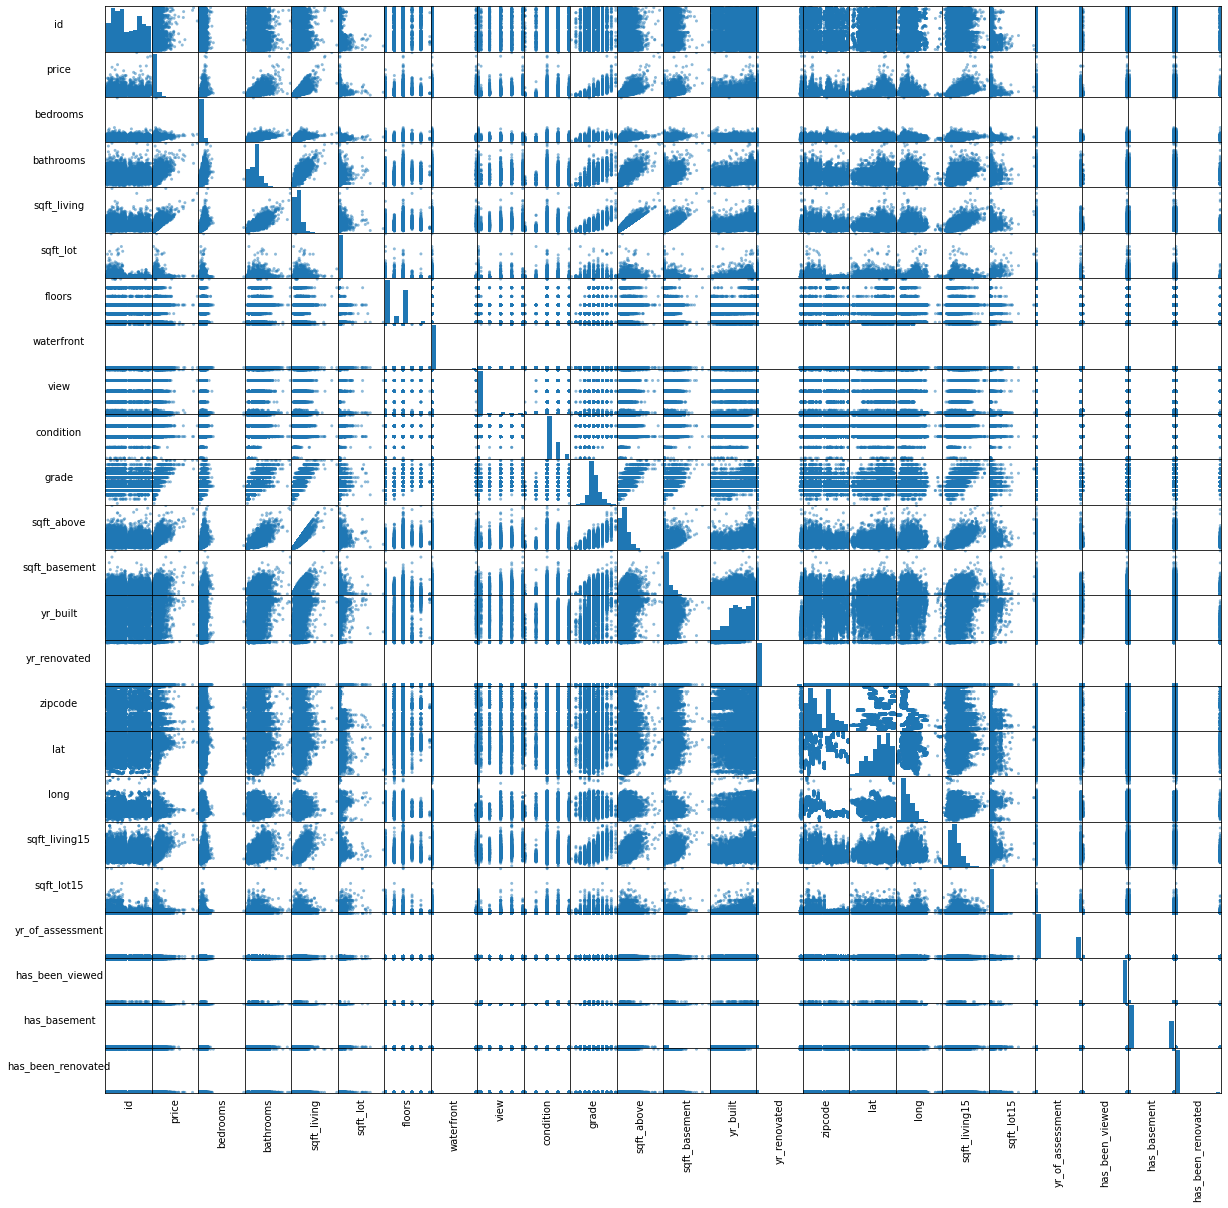

In [545]:
#scatter matrix - code from Multicollinearity lab lesson
sm = pd.plotting.scatter_matrix(data, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

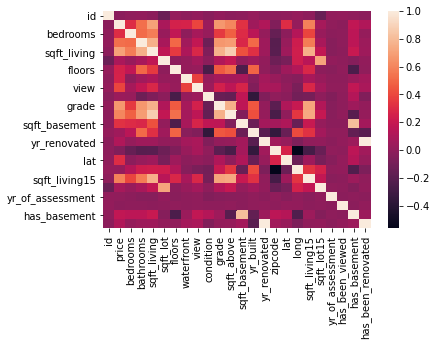

In [546]:
sns.heatmap(data.corr())

In [547]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_of_assessment,has_been_viewed,has_basement,has_been_renovated
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,1.157486e-02,-0.023803,...,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,0.009915,1.206156e-02,0.003495,-0.010621
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,3.937486e-01,0.036056,...,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,0.003727,-1.202360e-02,0.178264,0.117543
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,7.841807e-02,0.026496,...,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.009949,-3.233350e-03,0.158412,0.017635
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,1.860864e-01,-0.126479,...,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.026577,-2.738721e-03,0.159863,0.046742
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,2.819173e-01,-0.059445,...,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.029014,-9.947942e-03,0.201198,0.050829
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,7.512950e-02,-0.008830,...,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.005628,-3.934264e-03,-0.034889,0.005091
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,2.840114e-02,-0.264075,...,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.022352,9.991926e-04,-0.252465,0.003713
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,3.806944e-01,0.016648,...,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658,-0.005018,-6.015252e-03,0.039220,0.074267
view,0.011575,0.393749,0.078418,0.186086,0.281917,0.075130,0.028401,0.380694,1.000000e+00,0.045676,...,0.090260,0.085142,0.006131,-0.077786,0.279109,0.073174,0.001501,-1.913682e-08,0.177184,0.090401
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,4.567576e-02,1.000000,...,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.045898,-2.878424e-03,0.130542,-0.055383


In [548]:
data.corr().price.sort_values(ascending=False)
# Future question - check for multi collinearity between features

price                 1.000000
sqft_living           0.701917
grade                 0.667951
sqft_above            0.605368
sqft_living15         0.585241
bathrooms             0.525906
view                  0.393749
sqft_basement         0.322192
bedrooms              0.308787
lat                   0.306692
waterfront            0.264306
floors                0.256804
has_basement          0.178264
yr_renovated          0.117855
has_been_renovated    0.117543
sqft_lot              0.089876
sqft_lot15            0.082845
yr_built              0.053953
condition             0.036056
long                  0.022036
yr_of_assessment      0.003727
has_been_viewed      -0.012024
id                   -0.016772
zipcode              -0.053402
Name: price, dtype: float64

In [549]:
#Average price across dataset, a baseline measurement
data['price'].mean()

540296.5735055795

In [550]:
# Try top 5
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']

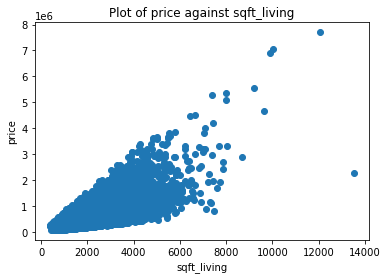

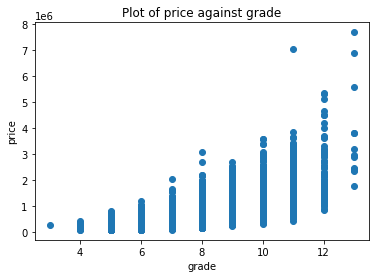

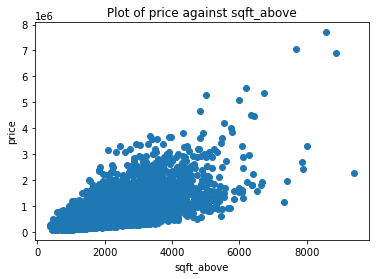

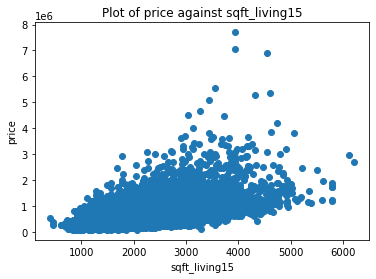

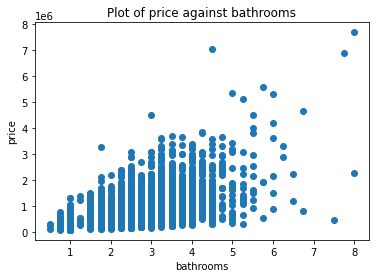

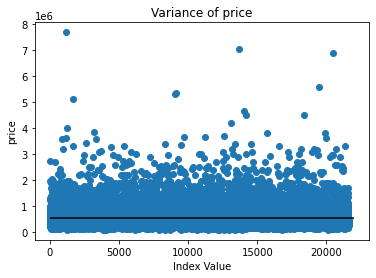

In [551]:
for x in features:
    plt.scatter(data[x], data['price'])
    plt.title(f'Plot of price against {x}')
    plt.xlabel(x)
    plt.ylabel('price')
    plt.show()
    
    
# also plot sales against itself
plt.scatter(data.index, data['price'])
plt.hlines(data['price'].mean(), 0, 22000)
plt.xlabel('Index Value')
plt.ylabel('price')
plt.title('Variance of price')
plt.show()

## Zipcode model beginnings

In [23]:
# Data Discovery on Zipcodes
zipcode_vals = data['zipcode'].unique()

In [24]:
#populate zipcode column
zipcode_overview['zipcode'] = zipcode_vals

In [25]:
# Preview DataFrame
zipcode_overview

,zipcode,property_count,long_min,long_max,lat_min,lat_max,price_min,price_max,price_avg,price_med
0,98042,547,-122.177,-122.039,47.3117,47.4230,105000.0,859000.0,311580.0,291500.0
1,98107,266,-122.406,-122.351,47.6536,47.6762,290000.0,2950000.0,579110.0,529950.0
2,98074,441,-122.089,-121.992,47.5906,47.6569,280000.0,3080000.0,685676.0,642000.0
3,98059,468,-122.188,-122.063,47.4596,47.5405,172500.0,1780000.0,493625.0,435000.0
4,98115,583,-122.329,-122.263,47.6721,47.7009,200000.0,2300000.0,619944.0,567000.0
...,...,...,...,...,...,...,...,...,...,...
65,98010,100,-122.053,-121.867,47.2931,47.3783,135000.0,935000.0,423666.0,359999.5
66,98102,104,-122.385,-122.310,47.5617,47.6507,330000.0,7700000.0,899608.0,710000.0
67,98002,199,-122.229,-122.080,47.2761,47.3532,95000.0,389000.0,234284.0,235000.0
68,98148,57,-122.336,-122.322,47.4238,47.4666,105500.0,600600.0,284909.0,278000.0


In [26]:
pd.unique(data['zipcode'])

array([98042, 98107, 98074, 98059, 98115, 98030, 98075, 98028, 98034,
       98118, 98032, 98040, 98166, 98103, 98177, 98006, 98023, 98038,
       98004, 98117, 98029, 98125, 98155, 98003, 98112, 98178, 98105,
       98058, 98053, 98198, 98024, 98045, 98092, 98106, 98133, 98005,
       98146, 98108, 98007, 98031, 98055, 98014, 98008, 98027, 98070,
       98022, 98033, 98019, 98126, 98072, 98136, 98052, 98122, 98168,
       98109, 98144, 98001, 98199, 98116, 98065, 98119, 98056, 98077,
       98188, 98011, 98010, 98102, 98002, 98148, 98039])

In [27]:
#testing
data[data['zipcode'] == zipcode_vals[0]]['id'].count()

547

In [28]:
# Populate rest of zipcode_overview DataFrame

# Create lists
zipcode_property_count = []
zipcode_long_min = []
zipcode_long_max = []
zipcode_lat_min = []
zipcode_lat_max = []
zipcode_price_min = []
zipcode_price_max = []
zipcode_price_avg = []
zipcode_price_med = []

# Get df values for each zipcode
for zipcode in zipcode_vals:
    zipcode_property_count.append(data[data['zipcode'] == zipcode]['id'].count())
    zipcode_long_min.append(data[data['zipcode'] == zipcode]['long'].min())
    zipcode_long_max.append(data[data['zipcode'] == zipcode]['long'].max())
    zipcode_lat_min.append(data[data['zipcode'] == zipcode]['lat'].min())
    zipcode_lat_max.append(data[data['zipcode'] == zipcode]['lat'].max())
    zipcode_price_min.append(data[data['zipcode'] == zipcode]['price'].min())
    zipcode_price_max.append(data[data['zipcode'] == zipcode]['price'].max())
    zipcode_price_avg.append(round(data[data['zipcode'] == zipcode]['price'].mean(), 0))
    zipcode_price_med.append(data[data['zipcode'] == zipcode]['price'].median())
    

# Assign lists to df columns
zipcode_overview['property_count'] = zipcode_property_count
zipcode_overview['long_min'] = zipcode_long_min
zipcode_overview['long_max'] = zipcode_long_max
zipcode_overview['lat_min'] = zipcode_lat_min
zipcode_overview['lat_max'] = zipcode_lat_max
zipcode_overview['price_min'] = zipcode_price_min
zipcode_overview['price_max'] = zipcode_price_max
zipcode_overview['price_avg'] = zipcode_price_avg
zipcode_overview['price_med'] = zipcode_price_med

In [29]:
#Preview 
zipcode_overview

,zipcode,property_count,long_min,long_max,lat_min,lat_max,price_min,price_max,price_avg,price_med
0,98042,547,-122.177,-122.039,47.3117,47.4230,105000.0,859000.0,311580.0,291500.0
1,98107,266,-122.406,-122.351,47.6536,47.6762,290000.0,2950000.0,579110.0,529950.0
2,98074,441,-122.089,-121.992,47.5906,47.6569,280000.0,3080000.0,685676.0,642000.0
3,98059,468,-122.188,-122.063,47.4596,47.5405,172500.0,1780000.0,493625.0,435000.0
4,98115,583,-122.329,-122.263,47.6721,47.7009,200000.0,2300000.0,619944.0,567000.0
...,...,...,...,...,...,...,...,...,...,...
65,98010,100,-122.053,-121.867,47.2931,47.3783,135000.0,935000.0,423666.0,359999.5
66,98102,104,-122.385,-122.310,47.5617,47.6507,330000.0,7700000.0,899608.0,710000.0
67,98002,199,-122.229,-122.080,47.2761,47.3532,95000.0,389000.0,234284.0,235000.0
68,98148,57,-122.336,-122.322,47.4238,47.4666,105500.0,600600.0,284909.0,278000.0


In [30]:
# Are number of properties within zipcode impacting measurement - what zipcodes do I have most info about
zipcode_overview.groupby(by='zipcode')['property_count'].sum().sort_values(ascending=False)

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: property_count, Length: 70, dtype: int64

In [31]:
zipcode_overview['property_count'].describe()

count     70.000000
mean     308.528571
std      142.223820
min       50.000000
25%      204.250000
50%      282.500000
75%      408.250000
max      602.000000
Name: property_count, dtype: float64

In [32]:
top_repped_zips_75 = zipcode_overview[zipcode_overview['property_count'] >= 408.25]['zipcode'].unique()

arr = top_repped_zips_75
top_repped_zips_75 = arr.tolist()

In [33]:
top_zips_75_data_df = data[data['zipcode'].isin(top_repped_zips_75)]
top_zips_75_zo_df = zipcode_overview[zipcode_overview['zipcode'].isin(top_repped_zips_75)]

In [34]:
top_zips_75_zo_df

,zipcode,property_count,long_min,long_max,lat_min,lat_max,price_min,price_max,price_avg,price_med
0,98042,547,-122.177,-122.039,47.3117,47.4230,105000.0,859000.0,311580.0,291500.0
2,98074,441,-122.089,-121.992,47.5906,47.6569,280000.0,3080000.0,685676.0,642000.0
3,98059,468,-122.188,-122.063,47.4596,47.5405,172500.0,1780000.0,493625.0,435000.0
4,98115,583,-122.329,-122.263,47.6721,47.7009,200000.0,2300000.0,619944.0,567000.0
8,98034,545,-122.260,-122.145,47.6705,47.7404,90000.0,3120000.0,521740.0,445950.0
9,98118,507,-122.292,-122.249,47.5118,47.5694,109000.0,2900000.0,418019.0,367500.0
13,98103,602,-122.364,-122.329,47.6485,47.7011,238000.0,1700000.0,585049.0,550000.0
15,98006,498,-122.197,-122.101,47.5380,47.5784,247500.0,4210000.0,859939.0,760184.5
16,98023,499,-122.401,-122.335,47.2707,47.3408,86500.0,1280000.0,286743.0,268450.0
17,98038,589,-122.079,-121.936,47.3438,47.4583,110000.0,1350000.0,367091.0,342000.0


In [36]:
top_zips_75_zo_df['price_avg'].describe()

count        18.000000
mean     523712.611111
std      163677.511510
min      286743.000000
25%      394763.750000
50%      507682.500000
75%      619221.500000
max      859939.000000
Name: price_avg, dtype: float64

In [37]:
top_zips_75_data_df[top_zips_75_data_df['price'] >= 619221.6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_of_assessment,has_been_viewed,grade_category,has_basement,has_been_renovated
5,9547200530,2015-01-12,780000.0,6,4.00,3300,5720,1.0,0.0,0.0,...,98115,47.6760,-122.309,2030,4080,2015,1,Average,1,0
17,9482700075,2015-01-12,800000.0,4,3.50,2370,3302,2.0,0.0,0.0,...,98103,47.6840,-122.341,2170,3800,2015,1,Average,1,1
19,9323610110,2015-01-12,710000.0,4,2.50,2870,11304,2.0,0.0,0.0,...,98006,47.5547,-122.154,2690,9940,2015,1,Average,0,0
25,4441300170,2015-01-12,1300000.0,4,2.50,3110,11857,2.0,0.0,4.0,...,98117,47.6952,-122.402,3110,11570,2015,1,High,1,0
43,8927600070,2015-01-13,630000.0,3,1.75,1540,6930,1.0,0.0,0.0,...,98115,47.6782,-122.278,1760,6930,2015,1,Average,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21564,2726059100,2014-09-09,950000.0,4,3.00,2980,44431,2.0,0.0,0.0,...,98034,47.7154,-122.161,2010,7332,2014,1,High,1,0
21566,1245500276,2014-09-09,718000.0,3,2.50,2070,7200,2.0,0.0,0.0,...,98033,47.6946,-122.211,1650,8877,2014,1,Average,0,0
21571,9206500250,2014-09-09,1100000.0,4,4.00,3770,8899,2.0,0.0,0.0,...,98074,47.6476,-122.079,3300,8308,2014,1,High,1,0
21573,1786810040,2014-09-09,698000.0,3,2.75,2640,11957,1.5,0.0,0.0,...,98052,47.6491,-122.120,2640,12641,2014,1,Average,1,0


In [38]:
top_zips_75_data_df.groupby(by=['bedrooms'])['id'].count()

bedrooms
1       64
2     1055
3     4177
4     2955
5      670
6      109
7       17
8        3
9        1
10       1
33       1
Name: id, dtype: int64

In [39]:
# Do same with top 50% of property count for data expansion

top_repped_zips_50 = zipcode_overview[zipcode_overview['property_count'] >= 282.5]['zipcode'].unique()

arr = top_repped_zips_50
top_repped_zips_50 = arr.tolist()

top_zips_50_data_df = data[data['zipcode'].isin(top_repped_zips_50)]
top_zips_50_zo_df = zipcode_overview[zipcode_overview['zipcode'].isin(top_repped_zips_50)]

In [40]:
# Look at how many zipcodes are represented in each
print(len(top_repped_zips_75))
print(len(top_repped_zips_50))

18
35


In [42]:
# How much more info added in top 50 versus top 75
print(top_zips_75_data_df.shape)
print(top_zips_50_data_df.shape)

(9053, 26)
(14702, 26)


In [43]:
# How is average price impacted
print(top_zips_75_data_df['price'].mean())
print(top_zips_50_data_df['price'].mean())

521936.0469457638
542747.93075772


In [44]:
# How is median price impacted
print(top_zips_75_data_df['price'].median())
print(top_zips_50_data_df['price'].median())

452000.0
464025.0


In [45]:
top_zips_75_data_df['price'].describe()

count    9.053000e+03
mean     5.219360e+05
std      2.918268e+05
min      8.650000e+04
25%      3.400000e+05
50%      4.520000e+05
75%      6.250000e+05
max      5.110000e+06
Name: price, dtype: float64

In [46]:
top_zips_50_data_df['price'].describe()

count    1.470200e+04
mean     5.427479e+05
std      3.344338e+05
min      8.200000e+04
25%      3.430000e+05
50%      4.640250e+05
75%      6.482700e+05
max      7.060000e+06
Name: price, dtype: float64

In [47]:
# what if looking at grade - top 50
top_zips_50_data_df.groupby(by='grade')['id'].count()

grade
4       15
5      135
6     1296
7     6034
8     4269
9     1812
10     807
11     270
12      58
13       6
Name: id, dtype: int64

In [48]:
#  what if looking at grade - top 75
top_zips_75_data_df.groupby(by='grade')['id'].count()

grade
4       10
5       52
6      751
7     3974
8     2613
9     1018
10     433
11     158
12      40
13       4
Name: id, dtype: int64

In [49]:
top_zips_50_zo_df

,zipcode,property_count,long_min,long_max,lat_min,lat_max,price_min,price_max,price_avg,price_med
0,98042,547,-122.177,-122.039,47.3117,47.4230,105000.0,859000.0,311580.0,291500.0
2,98074,441,-122.089,-121.992,47.5906,47.6569,280000.0,3080000.0,685676.0,642000.0
3,98059,468,-122.188,-122.063,47.4596,47.5405,172500.0,1780000.0,493625.0,435000.0
4,98115,583,-122.329,-122.263,47.6721,47.7009,200000.0,2300000.0,619944.0,567000.0
6,98075,359,-122.086,-121.965,47.5595,47.6018,406430.0,3200000.0,790735.0,739999.0
7,98028,283,-122.270,-122.220,47.7325,47.7769,160000.0,1600000.0,462489.0,445000.0
8,98034,545,-122.260,-122.145,47.6705,47.7404,90000.0,3120000.0,521740.0,445950.0
9,98118,507,-122.292,-122.249,47.5118,47.5694,109000.0,2900000.0,418019.0,367500.0
13,98103,602,-122.364,-122.329,47.6485,47.7011,238000.0,1700000.0,585049.0,550000.0
15,98006,498,-122.197,-122.101,47.5380,47.5784,247500.0,4210000.0,859939.0,760184.5


## Let's just try a shitty model

In [50]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [51]:
top_zips_50_data_df.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_of_assessment',
 'has_been_viewed',
 'grade_category',
 'has_basement',
 'has_been_renovated']

## Removed categorical columns

In [52]:
# Define our X and y

# neat trick; include all column names in a list except for target (price) and categoricals
X_cols = [c for c in top_zips_50_data_df.columns.to_list() if c not in ['id', 'date','price', 'has_been_viewed',
                                                                       'grade_category', 'has_basement', 
                                                                        'has_been_renovated']]

X = top_zips_50_data_df[X_cols]
y = top_zips_50_data_df['price']

In [53]:
model = sm.OLS(y.astype(float), sm.add_constant(X.astype(float)))

In [54]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1934.
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:23:28   Log-Likelihood:            -1.9866e+05
No. Observations:               14702   AIC:                         3.974e+05
Df Residuals:                   14682   BIC:                         3.975e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.548e+07   7.33e+06     -6.208      0.000   -5.98e+07   -3.11e+07
bedrooms         -3.125e+04   2048.968    -15.250      0.000   -3.53e+04   -2.72e+04
bathrooms         3.172e+04   3570.940      8.883      0.000    2.47e+04    3.87e+04
sqft_living        117.8780     23.208      5.079      0.000      72.387     163.369
sqft_lot             0.2069      0.073      2.839      0.005       0.064       0.350
floors            -901.2968   3962.910     -0.227      0.820   -8669.098    6866.504
waterfront        8.433e+05   2.26e+04     37.353      0.000    7.99e+05    8.88e+05
view              5.949e+04   2399.436     24.795      0.000    5.48e+04    6.42e+04
condition         2.187e+04   2556.969      8.551      0.000    1.69e+04    2.69e+04
grade             8.707e+04   2345.272     37.125      0.000    8.25e+04    9.17e+04
sqft_above          53.0942     23.217      2.287      0.022       7.585      98.603
sqft_basement       21.7674     23.189      0.939      0.348     -23.686      67.221
yr_built         -1998.8779     82.255    -24.301      0.000   -2160.108   -1837.648
yr_renovated        30.0389      4.473      6.716      0.000      21.271      38.807
zipcode           -715.2303     41.160    -17.377      0.000    -795.908    -634.552
lat               6.601e+05   1.25e+04     52.757      0.000    6.36e+05    6.85e+05
long             -1.958e+05   1.58e+04    -12.402      0.000   -2.27e+05   -1.65e+05
sqft_living15       19.0404      3.837      4.963      0.000      11.520      26.561
sqft_lot15          -0.2334      0.114     -2.049      0.040      -0.457      -0.010
yr_of_assessment  3.161e+04   3157.603     10.012      0.000    2.54e+04    3.78e+04
==============================================================================
Omnibus:                    11840.265   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           986614.973
Skew:                           3.313   Prob(JB):                         0.00
Kurtosis:                      42.581   Cond. No.                     4.95e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
model = sm.OLS(y.astype(float), sm.add_constant(X.astype(float)))

In [54]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1934.
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:23:28   Log-Likelihood:            -1.9866e+05
No. Observations:               14702   AIC:                         3.974e+05
Df Residuals:                   14682   BIC:                         3.975e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.548e+07   7.33e+06     -6.208      0.000   -5.98e+07   -3.11e+07
bedrooms         -3.125e+04   2048.968    -15.250      0.000   -3.53e+04   -2.72e+04
bathrooms         3.172e+04   3570.940      8.883      0.000    2.47e+04    3.87e+04
sqft_living        117.8780     23.208      5.079      0.000      72.387     163.369
sqft_lot             0.2069      0.073      2.839      0.005       0.064       0.350
floors            -901.2968   3962.910     -0.227      0.820   -8669.098    6866.504
waterfront        8.433e+05   2.26e+04     37.353      0.000    7.99e+05    8.88e+05
view              5.949e+04   2399.436     24.795      0.000    5.48e+04    6.42e+04
condition         2.187e+04   2556.969      8.551      0.000    1.69e+04    2.69e+04
grade             8.707e+04   2345.272     37.125      0.000    8.25e+04    9.17e+04
sqft_above          53.0942     23.217      2.287      0.022       7.585      98.603
sqft_basement       21.7674     23.189      0.939      0.348     -23.686      67.221
yr_built         -1998.8779     82.255    -24.301      0.000   -2160.108   -1837.648
yr_renovated        30.0389      4.473      6.716      0.000      21.271      38.807
zipcode           -715.2303     41.160    -17.377      0.000    -795.908    -634.552
lat               6.601e+05   1.25e+04     52.757      0.000    6.36e+05    6.85e+05
long             -1.958e+05   1.58e+04    -12.402      0.000   -2.27e+05   -1.65e+05
sqft_living15       19.0404      3.837      4.963      0.000      11.520      26.561
sqft_lot15          -0.2334      0.114     -2.049      0.040      -0.457      -0.010
yr_of_assessment  3.161e+04   3157.603     10.012      0.000    2.54e+04    3.78e+04
==============================================================================
Omnibus:                    11840.265   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           986614.973
Skew:                           3.313   Prob(JB):                         0.00
Kurtosis:                      42.581   Cond. No.                     4.95e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Scaler testing... didn't do anything...

In [55]:
# Instantiate a scaler and scale our data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [56]:
scaled_model = sm.OLS(y, sm.add_constant(X_scaled))

In [57]:
scaled_results = scaled_model.fit()

scaled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1934.
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:23:28   Log-Likelihood:            -1.9866e+05
No. Observations:               14702   AIC:                         3.974e+05
Df Residuals:                   14682   BIC:                         3.975e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.427e+05   1474.750    368.027      0.000     5.4e+05    5.46e+05
x1         -2.893e+04   1897.256    -15.250      0.000   -3.27e+04   -2.52e+04
x2          2.406e+04   2708.961      8.883      0.000    1.88e+04    2.94e+04
x3           1.07e+05   2.11e+04      5.079      0.000    6.57e+04    1.48e+05
x4          6244.5360   2199.305      2.839      0.005    1933.622    1.06e+04
x5          -490.8010   2158.002     -0.227      0.820   -4720.755    3739.153
x6          5.927e+04   1586.799     37.353      0.000    5.62e+04    6.24e+04
x7          4.311e+04   1738.548     24.795      0.000    3.97e+04    4.65e+04
x8           1.42e+04   1660.031      8.551      0.000    1.09e+04    1.74e+04
x9           1.01e+05   2720.729     37.125      0.000    9.57e+04    1.06e+05
x10          4.42e+04   1.93e+04      2.287      0.022    6314.304    8.21e+04
x11         9426.5634      1e+04      0.939      0.348   -1.03e+04    2.91e+04
x12         -5.87e+04   2415.510    -24.301      0.000   -6.34e+04    -5.4e+04
x13         1.046e+04   1558.132      6.716      0.000    7409.752    1.35e+04
x14        -3.448e+04   1984.353    -17.377      0.000   -3.84e+04   -3.06e+04
x15         8.665e+04   1642.480     52.757      0.000    8.34e+04    8.99e+04
x16        -2.599e+04   2095.281    -12.402      0.000   -3.01e+04   -2.19e+04
x17         1.324e+04   2668.137      4.963      0.000    8011.620    1.85e+04
x18        -4557.7670   2224.023     -2.049      0.040   -8917.130    -198.404
x19         1.481e+04   1479.330     10.012      0.000    1.19e+04    1.77e+04
==============================================================================
Omnibus:                    11840.265   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           986614.973
Skew:                           3.313   Prob(JB):                         0.00
Kurtosis:                      42.581   Cond. No.                         47.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Added Booleean columns back in - improved by 0.002

In [58]:
# Define our X and y

# neat trick; include all column names in a list except for target (price) and categoricals
X_cols = [c for c in top_zips_50_data_df.columns.to_list() if c not in ['price', 'id', 'date', 'grade_category']]

X = top_zips_50_data_df[X_cols]
y = top_zips_50_data_df['price']

In [59]:
model = sm.OLS(y.astype(float), sm.add_constant(X.astype(float)))

In [60]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1679.
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:23:28   Log-Likelihood:            -1.9863e+05
No. Observations:               14702   AIC:                         3.973e+05
Df Residuals:                   14679   BIC:                         3.975e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.495e+07   7.33e+06     -6.130      0.000   -5.93e+07   -3.06e+07
bedrooms           -3.134e+04   2045.635    -15.322      0.000   -3.54e+04   -2.73e+04
bathrooms           3.039e+04   3594.287      8.456      0.000    2.33e+04    3.74e+04
sqft_living          118.2118     23.167      5.103      0.000      72.802     163.622
sqft_lot               0.2149      0.073      2.953      0.003       0.072       0.357
floors              -552.8609   3958.261     -0.140      0.889   -8311.549    7205.828
waterfront          8.521e+05   2.26e+04     37.756      0.000    8.08e+05    8.96e+05
view                5.993e+04   2398.870     24.985      0.000    5.52e+04    6.46e+04
condition           2.286e+04   2557.357      8.937      0.000    1.78e+04    2.79e+04
grade               8.619e+04   2348.299     36.702      0.000    8.16e+04    9.08e+04
sqft_above            54.2961     23.184      2.342      0.019       8.853      99.739
sqft_basement         16.8835     23.670      0.713      0.476     -29.513      63.280
yr_built           -1989.7628     82.121    -24.230      0.000   -2150.730   -1828.796
yr_renovated        3982.6179    526.833      7.560      0.000    2949.959    5015.276
zipcode             -717.3818     41.172    -17.424      0.000    -798.084    -636.680
lat                 6.612e+05   1.25e+04     52.916      0.000    6.37e+05    6.86e+05
long               -1.954e+05   1.58e+04    -12.369      0.000   -2.26e+05   -1.64e+05
sqft_living15         19.4652      3.832      5.080      0.000      11.954      26.976
sqft_lot15            -0.2375      0.114     -2.089      0.037      -0.460      -0.015
yr_of_assessment    3.145e+04   3152.574      9.976      0.000    2.53e+04    3.76e+04
has_been_viewed    -1.744e+04   2.67e+04     -0.654      0.513   -6.97e+04    3.48e+04
has_basement        4722.5518   5634.584      0.838      0.402   -6321.940    1.58e+04
has_been_renovated -7.892e+06   1.05e+06     -7.503      0.000   -9.95e+06   -5.83e+06
==============================================================================
Omnibus:                    11843.450   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           982760.158
Skew:                           3.316   Prob(JB):                         0.00
Kurtosis:                      42.501   Cond. No.                     4.97e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Copied from 20-ExtensionsToLinearModels, really

One hot encoding grade category, then modeled/tested

In [61]:
cat_cols = ['grade_category']

In [62]:
x_cols = [*X_cols, *cat_cols]

In [63]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

In [64]:
# create an encoder object. This will help us to convert
# categorical variables to new columns
# if test set could influence whatebeer you are fitting, you want to fit on the training data alone
encoder = OneHotEncoder(drop='first')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct = ColumnTransformer(transformers=[
    ('ohe', encoder, cat_cols) #name it, tell it what to do encoder, give it columns
], remainder='passthrough') #can do multiple transformers and scalers with ColumnTransform

ct.fit(top_zips_50_data_df[x_cols])
X = ct.transform(top_zips_50_data_df[x_cols])

In [65]:
type(X)

numpy.ndarray

In [66]:
pd.DataFrame(X, columns= ct.get_feature_names()).head()

,ohe__x0_High,ohe__x0_Low,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_of_assessment,has_been_viewed,has_basement,has_been_renovated
0,0.0,0.0,4.0,2.5,2240.0,5105.0,2.0,0.0,0.0,4.0,...,0.0,98042.0,47.3922,-122.165,1920.0,5288.0,2015.0,1.0,0.0,0.0
1,0.0,0.0,4.0,2.5,2500.0,12090.0,1.0,0.0,0.0,3.0,...,0.0,98074.0,47.6346,-122.045,3380.0,12760.0,2015.0,1.0,0.0,0.0
2,0.0,0.0,3.0,2.0,1250.0,8636.0,1.0,0.0,0.0,5.0,...,0.0,98059.0,47.5066,-122.159,1620.0,7653.0,2015.0,1.0,0.0,0.0
3,0.0,0.0,6.0,4.0,3300.0,5720.0,1.0,0.0,0.0,3.0,...,0.0,98115.0,47.6760,-122.309,2030.0,4080.0,2015.0,1.0,1.0,0.0
4,0.0,0.0,3.0,2.5,1650.0,4648.0,2.0,0.0,0.0,3.0,...,0.0,98075.0,47.5968,-122.015,1800.0,5637.0,2015.0,1.0,0.0,0.0


In [67]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [68]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [69]:
# scale our data (age and bmi are same scale, but number of children is not)
scaler = StandardScaler()

# train on train data
scaler.fit(X_train)

# transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# now, let's model!
lr = LinearRegression ()

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [71]:
train_preds = lr.predict(X_train_scaled)
test_preds = lr.predict(X_test_scaled)

In [72]:
# evaluate
print(f"Train R2 { r2_score(y_train, train_preds)}")
print(f"Test R2 {r2_score(y_test, test_preds)}")
#model accounts for 72% of the variance in our target
print(f"Train RMSE {mean_squared_error(y_train, train_preds, squared=False)}") #set to False to get root mean squared error
print(f"Test RMSE {mean_squared_error(y_test, test_preds, squared=False)}")
# Results mean that model is ~177k off --> BAD

Train R2 0.7202971703415397
Test R2 0.726511372427634
Train RMSE 177116.31775633318
Test RMSE 174127.4353465539


## Tried taking out the columns with p value > 0.05 and R-squared got worse

In [73]:
# Define our X and y

# neat trick; include all column names in a list except for target (price) and categoricals
X_cols = [c for c in top_zips_50_data_df.columns.to_list() if c not in ['price', 'id', 'date', 'grade_category', 
                                                                        'floors', 'view', 'sqft_basement']]

X = top_zips_50_data_df[X_cols]
y = top_zips_50_data_df['price']

In [74]:
model = sm.OLS(y.astype(float), sm.add_constant(X.astype(float)))

In [75]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     1833.
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:23:29   Log-Likelihood:            -1.9894e+05
No. Observations:               14702   AIC:                         3.979e+05
Df Residuals:                   14682   BIC:                         3.981e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -5.68e+07   7.43e+06     -7.642      0.000   -7.14e+07   -4.22e+07
bedrooms           -3.555e+04   2080.799    -17.085      0.000   -3.96e+04   -3.15e+04
bathrooms           3.344e+04   3540.646      9.443      0.000    2.65e+04    4.04e+04
sqft_living          157.5916      6.569     23.990      0.000     144.715     170.468
sqft_lot               0.2192      0.074      2.952      0.003       0.074       0.365
waterfront          1.039e+06   2.17e+04     47.784      0.000    9.96e+05    1.08e+06
condition           2.414e+04   2605.843      9.262      0.000     1.9e+04    2.92e+04
grade               9.118e+04   2382.189     38.276      0.000    8.65e+04    9.58e+04
sqft_above            12.3485      6.966      1.773      0.076      -1.306      26.003
yr_built           -2154.4101     80.732    -26.686      0.000   -2312.655   -1996.166
yr_renovated        3731.7234    537.763      6.939      0.000    2677.640    4785.807
zipcode             -663.8389     41.374    -16.045      0.000    -744.937    -582.741
lat                 6.482e+05   1.27e+04     50.859      0.000    6.23e+05    6.73e+05
long               -2.259e+05    1.6e+04    -14.078      0.000   -2.57e+05   -1.94e+05
sqft_living15         36.1799      3.828      9.450      0.000      28.676      43.684
sqft_lot15            -0.2484      0.116     -2.142      0.032      -0.476      -0.021
yr_of_assessment    3.331e+04   3217.043     10.355      0.000     2.7e+04    3.96e+04
has_been_viewed    -1.555e+04   2.72e+04     -0.571      0.568   -6.89e+04    3.78e+04
has_basement       -1695.2046   5615.029     -0.302      0.763   -1.27e+04    9310.957
has_been_renovated -7.385e+06   1.07e+06     -6.878      0.000   -9.49e+06   -5.28e+06
==============================================================================
Omnibus:                    11551.789   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           824099.846
Skew:                           3.234   Prob(JB):                         0.00
Kurtosis:                      39.103   Cond. No.                     4.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""